## CIFAR 이미지 분류 모델 구현
---
- 데이터 : CIFAR https://www.cs.toronto.edu/~kriz/cifar.html
- 학습방법 : 10가지 이미지 종류 분류 => 다중분류
- 이미지 : DNN(MLP), CNN 적용

0	airplane  
1	automobile  
2	bird  
3	cat  
4	deer  
5	dog  
6	frog  
7	horse  
8	ship  
9	truck  

In [99]:
# 모듈 로딩
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow import random  # random seed 설정용
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [100]:
(x_train, y_train), (x_test, y_test)=load_data()

In [101]:
print(f'x_train.shape : {x_train.shape}, x_test.shape : {x_test.shape}')
print(f'y_train.shape : {y_train.shape}, y_test.shape : {y_test.shape}')

x_train.shape : (50000, 32, 32, 3), x_test.shape : (10000, 32, 32, 3)
y_train.shape : (50000, 1), y_test.shape : (10000, 1)


In [102]:
# 검증용 데이터 준비
x_train, x_val, y_train, y_val=train_test_split(
x_train, y_train, stratify=y_train, random_state=42)

In [103]:
# 스케일링
x_train=x_train/255.0
x_test=x_test/255.0
x_val=x_val/255.0

In [104]:
print(f'x_train.shape : {x_train.shape}\nx_test.shape : {x_test.shape}\nx_val.shape : {x_val.shape}')

x_train.shape : (37500, 32, 32, 3)
x_test.shape : (10000, 32, 32, 3)
x_val.shape : (12500, 32, 32, 3)


In [105]:
## W, b 초기값 고정
random.set_seed(11)

### 모델 구상

In [255]:
model=Sequential(name='cifar10')

In [256]:
model.add(Conv2D(10, kernel_size=3, padding='same',
                input_shape=(32, 32, 3)))

In [257]:
model.add(MaxPool2D())

In [258]:
model.add(Flatten())

In [259]:
model.add(Dense(100, activation='relu'))

In [260]:
model.add(Dropout(0.5))

In [261]:
model.add(Dense(10, activation='softmax'))

In [262]:
model.summary()

Model: "cifar10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 10)        280       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 10)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 2560)              0         
                                                                 
 dense_21 (Dense)            (None, 100)               256100    
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                           

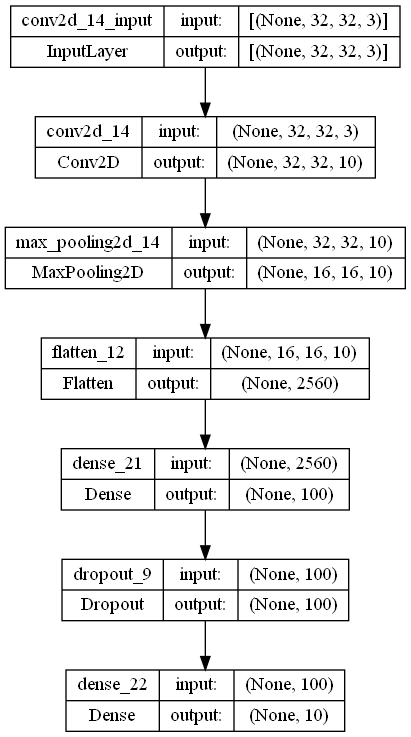

In [263]:
plot_model(model, show_shapes=True)

In [264]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')

### 모델 학습

In [265]:
stopCB=EarlyStopping(monitor='val_loss', patience=3)

In [266]:
MODEL_PATH='model.{epoch:02d}-{val_loss:.2f}.h5'
modelCB=ModelCheckpoint(filepath=MODEL_PATH,
                       save_best_only=True)

In [267]:
his=model.fit(x_train, y_train, epochs=30, batch_size=200,
             validation_data=(x_val, y_val),
             callbacks=[stopCB, modelCB])

Epoch 1/30
188/188 [==============================] - 8s 42ms/step - loss: 1.8641 - accuracy: 0.3279 - val_loss: 1.5800 - val_accuracy: 0.4488
Epoch 2/30
188/188 [==============================] - 8s 40ms/step - loss: 1.5967 - accuracy: 0.4304 - val_loss: 1.4707 - val_accuracy: 0.4874
Epoch 3/30
188/188 [==============================] - 7s 39ms/step - loss: 1.4929 - accuracy: 0.4696 - val_loss: 1.4485 - val_accuracy: 0.4982
Epoch 4/30
188/188 [==============================] - 7s 40ms/step - loss: 1.4211 - accuracy: 0.4990 - val_loss: 1.3296 - val_accuracy: 0.5395
Epoch 5/30
188/188 [==============================] - 7s 40ms/step - loss: 1.3811 - accuracy: 0.5130 - val_loss: 1.2938 - val_accuracy: 0.5532
Epoch 6/30
188/188 [==============================] - 7s 39ms/step - loss: 1.3336 - accuracy: 0.5293 - val_loss: 1.2620 - val_accuracy: 0.5599
Epoch 7/30
188/188 [==============================] - 8s 41ms/step - loss: 1.2905 - accuracy: 0.5471 - val_loss: 1.2360 - val_accuracy: 0.5721

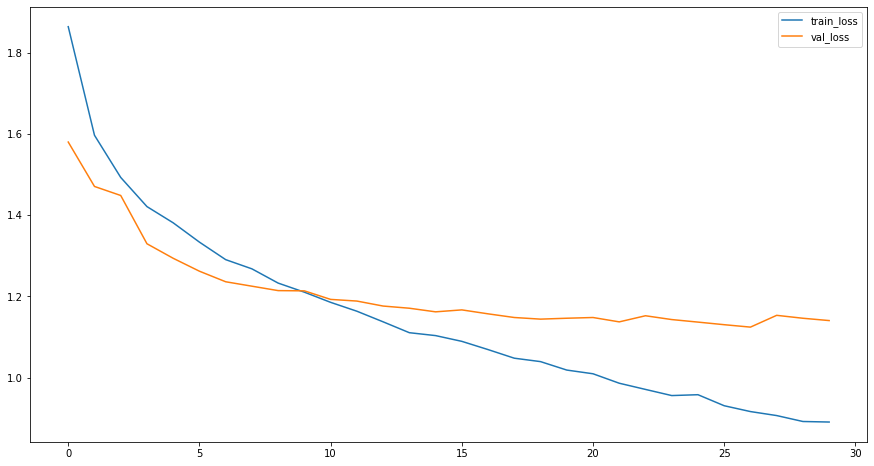

In [268]:
plt.figure(figsize=(15, 8))
plt.plot(his.epoch, his.history['loss'], label='train_loss')
plt.plot(his.epoch, his.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

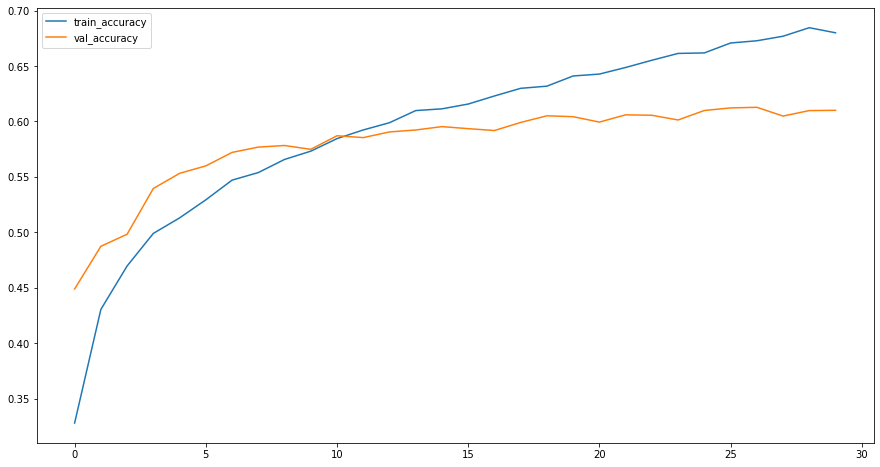

In [269]:
plt.figure(figsize=(15, 8))
plt.plot(his.epoch, his.history['accuracy'], label='train_accuracy')
plt.plot(his.epoch, his.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [270]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1421 - accuracy: 0.6091


[1.1421468257904053, 0.6090999841690063]

In [271]:
import PIL.Image as pilimg

image = pilimg.open('airplane.jpg')
pix = np.array(image)


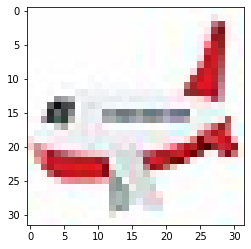

In [273]:
plt.imshow(pix)

In [294]:
np.round(model.predict((pix/255.0).reshape(-1, 32, 32, 3)))

1/1 [==============================] - 0s 15ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

1/1 [==============================] - 0s 15ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

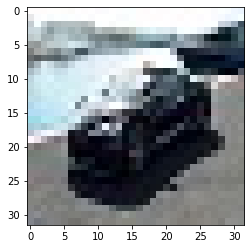

In [277]:
image3 = pilimg.open('automobile.jpg')
pix3 = np.array(image3)
plt.imshow(pix3)
np.round(model.predict((pix3/255.0).reshape(-1, 32, 32, 3)))

1/1 [==============================] - 0s 14ms/step


array([[0.54, 0.08, 0.01, 0.26, 0.  , 0.01, 0.09, 0.  , 0.  , 0.  ]],
      dtype=float32)

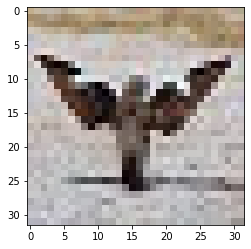

In [279]:
image4 = pilimg.open('bird.jpg')
pix4 = np.array(image4)
plt.imshow(pix4)
np.round(model.predict((pix4/255.0).reshape(-1, 32, 32, 3)), 2)

1/1 [==============================] - 0s 14ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

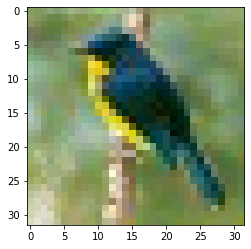

In [280]:
image15 = pilimg.open('bird2.jpg')
pix15 = np.array(image15)
plt.imshow(pix15)
np.round(model.predict((pix15/255.0).reshape(-1, 32, 32, 3)))

1/1 [==============================] - 0s 14ms/step


array([[0. , 0. , 0. , 0.6, 0. , 0.3, 0. , 0.1, 0. , 0. ]], dtype=float32)

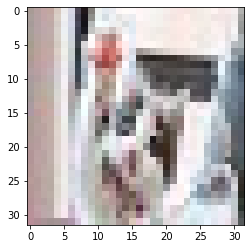

In [281]:
image5 = pilimg.open('cat.jpg')
pix5 = np.array(image5)
plt.imshow(pix5)
np.round(model.predict((pix5/255.0).reshape(-1, 32, 32, 3)), 1)

1/1 [==============================] - 0s 16ms/step


array([[0. , 0. , 0.5, 0.2, 0. , 0.3, 0. , 0. , 0. , 0. ]], dtype=float32)

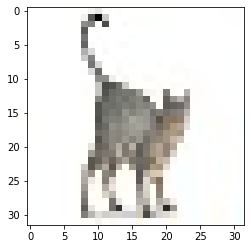

In [282]:
image16 = pilimg.open('cat2.jpg')
pix16 = np.array(image16)
plt.imshow(pix16)
np.round(model.predict((pix16/255.0).reshape(-1, 32, 32, 3)), 1)

1/1 [==============================] - 0s 13ms/step


array([[0.1, 0. , 0. , 0.3, 0. , 0.1, 0.3, 0. , 0. , 0.2]], dtype=float32)

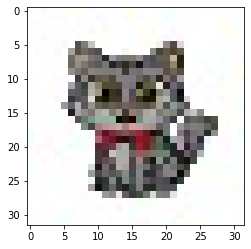

In [295]:
image17 = pilimg.open('cat3.jpg')
pix17 = np.array(image17)
plt.imshow(pix17)
np.round(model.predict((pix17/255.0).reshape(-1, 32, 32, 3)), 1)

1/1 [==============================] - 0s 16ms/step


array([[0.65, 0.  , 0.1 , 0.01, 0.01, 0.  , 0.  , 0.  , 0.22, 0.  ]],
      dtype=float32)

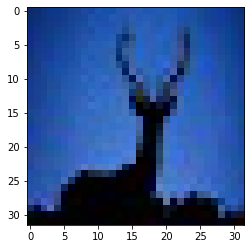

In [283]:
image6 = pilimg.open('deer.jpg')
pix6 = np.array(image6)
plt.imshow(pix6)
np.round(model.predict((pix6/255.0).reshape(-1, 32, 32, 3)), 2)

1/1 [==============================] - 0s 15ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

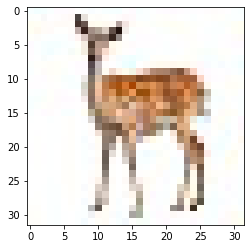

In [284]:
image17 = pilimg.open('deer2.jpg')
pix17 = np.array(image17)
plt.imshow(pix17)
np.round(model.predict((pix17/255.0).reshape(-1, 32, 32, 3)))

1/1 [==============================] - 0s 14ms/step


array([[0. , 0. , 0.1, 0.1, 0.1, 0.2, 0. , 0.5, 0. , 0. ]], dtype=float32)

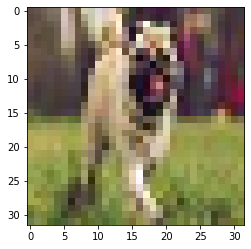

In [285]:
image7 = pilimg.open('dog.jpg')
pix7 = np.array(image7)
plt.imshow(pix7)
np.round(model.predict((pix7/255.0).reshape(-1, 32, 32, 3)), 1)

1/1 [==============================] - 0s 15ms/step


array([[0. , 0. , 0.2, 0.1, 0. , 0.4, 0. , 0.3, 0. , 0. ]], dtype=float32)

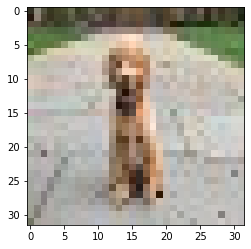

In [286]:
image13 = pilimg.open('dog2.jpg')
pix13 = np.array(image13)
plt.imshow(pix13)
np.round(model.predict((pix13/255.0).reshape(-1, 32, 32, 3)), 1)

1/1 [==============================] - 0s 15ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

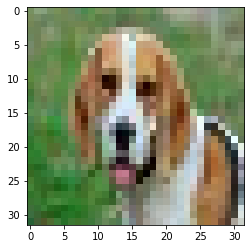

In [287]:
image14 = pilimg.open('dog3.jpg')
pix14 = np.array(image14)
plt.imshow(pix14)
np.round(model.predict((pix14/255.0).reshape(-1, 32, 32, 3)))

1/1 [==============================] - 0s 14ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

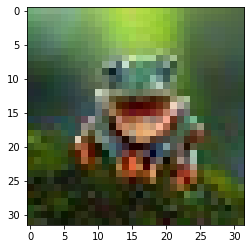

In [288]:
image8 = pilimg.open('frog.jpg')
pix8 = np.array(image8)
plt.imshow(pix8)
np.round(model.predict((pix8/255.0).reshape(-1, 32, 32, 3)))

1/1 [==============================] - 0s 14ms/step


array([[0. , 0. , 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. ]], dtype=float32)

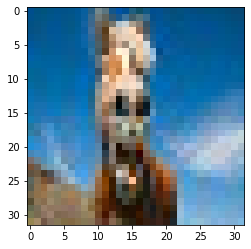

In [289]:
image9 = pilimg.open('horse.jpg')
pix9 = np.array(image9)
plt.imshow(pix9)
np.round(model.predict((pix9/255.0).reshape(-1, 32, 32, 3)), 1)

1/1 [==============================] - 0s 15ms/step


array([[0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0.5, 0. , 0.4]], dtype=float32)

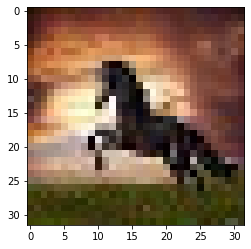

In [290]:
image12 = pilimg.open('horse2.jpg')
pix12 = np.array(image12)
plt.imshow(pix12)
np.round(model.predict((pix12/255.0).reshape(-1, 32, 32, 3)), 1)

1/1 [==============================] - 0s 15ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

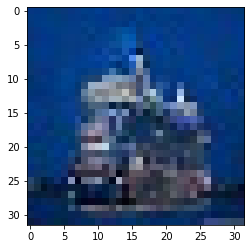

In [291]:
image10 = pilimg.open('ship.jpg')
pix10 = np.array(image10)
plt.imshow(pix10)
np.round(model.predict((pix10/255.0).reshape(-1, 32, 32, 3)))

1/1 [==============================] - 0s 15ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

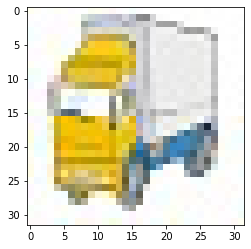

In [292]:
image11 = pilimg.open('truck.jpg')
pix11= np.array(image11)
plt.imshow(pix11)
np.round(model.predict((pix11/255.0).reshape(-1, 32, 32, 3)))